In [137]:
import pandas as pd
data=pd.read_csv('Placement.csv')
data

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [4]:
data['gender'].dtypes=='O'

True

## Quan and Qual

In [92]:
#To split into Quan and Qual
Quan=[]
Qual=[]
for columns in data.columns:
    if data[columns].dtypes=='O':
        Qual.append(columns)
    else:
        Quan.append(columns)

In [6]:
Quan

['sl_no', 'ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'salary']

In [7]:
Qual

['gender',
 'ssc_b',
 'hsc_b',
 'hsc_s',
 'degree_t',
 'workex',
 'specialisation',
 'status']

In [138]:
#make it as function using def keyword

def Quan_Qual_data(data):
    Quan=[]
    Qual=[]
    for columns in data.columns:
        if data[columns].dtypes=='O':
            Qual.append(columns)
        else:
            Quan.append(columns)
    return Quan,Qual

In [139]:
Quan,Qual=Quan_Qual_data(data)

In [13]:
Quan

['sl_no', 'ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'salary']

In [14]:
Qual

['gender',
 'ssc_b',
 'hsc_b',
 'hsc_s',
 'degree_t',
 'workex',
 'specialisation',
 'status']

In [16]:
#central tendency

data['ssc_p'].mode()[0]

62.0

In [17]:
data.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [18]:
#make it as dataframe

descriptive=pd.DataFrame(index=['Mean','Median','Mode'],columns=Quan)
descriptive

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
Mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Median,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mode,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
descriptive['ssc_p']['Mean']

nan

## Central tendency

In [24]:
descriptive=pd.DataFrame(index=['Mean','Median','Mode'],columns=Quan)
for column in Quan:
    descriptive[column]['Mean']=data[column].mean()
    descriptive[column]['Median']=data[column].median()
    descriptive[column]['Mode']=data[column].mode()[0]
    

In [25]:
descriptive

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
Mean,108,67.3034,66.3332,66.3702,72.1006,62.2782,288655
Median,108,67,65,66,71,62,265000
Mode,1,62,63,65,60,56.7,300000


## IQR

In [113]:
#IQR
descriptive=pd.DataFrame(index=['Mean','Median','Mode','Q1:25%','Q2:50%','Q3:75%','IQR','Lesser_Outlier','Greater_Outlier','Min','Max'],columns=Quan)
for column in Quan:
    descriptive[column]['Mean']=data[column].mean()
    descriptive[column]['Median']=data[column].median()
    descriptive[column]['Mode']=data[column].mode()[0]
    descriptive[column]['Q1:25%']=data.describe()[column]['25%']
    descriptive[column]['Q2:50%']=data.describe()[column]['50%']
    descriptive[column]['Q3:75%']=data.describe()[column]['75%']
    descriptive[column]['IQR']=descriptive[column]['Q3:75%']-descriptive[column]['Q1:25%']
    descriptive[column]['Lesser_Outlier']=descriptive[column]['Q1:25%']-(1.5*descriptive[column]['IQR'])
    descriptive[column]['Greater_Outlier']=descriptive[column]['Q3:75%']+(1.5*descriptive[column]['IQR'])
    descriptive[column]['Min']=data[column].min()
    descriptive[column]['Max']=data[column].max()


In [26]:
data.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [29]:
data.describe()['ssc_p']['25%']

60.599999999999994

In [96]:
descriptive

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
Mean,108,67.3034,66.3332,66.3702,72.1006,62.2782,288655
Median,108,67,65,66,71,62,265000
Mode,1,62,63,65,60,56.7,300000
Q1:25%,54.5,60.6,60.9,61,60,57.945,240000
Q2:50%,108,67,65,66,71,62,265000
Q3:75%,161.5,75.7,73,72,83.5,66.255,300000
IQR,107,15.1,12.1,11,23.5,8.31,60000
Lesser_Outlier,-106,37.95,42.75,44.5,24.75,45.48,150000
Greater_Outlier,322,98.35,91.15,88.5,118.75,78.72,390000
Min,1,40.89,37,50,50,51.21,200000


In [48]:
#Check the outliers
def check_outlier(Quan):
    Lesser=[]
    Greater=[]
    for columns in Quan:
        if descriptive[columns]['Min']<descriptive[columns]['Lesser_Outlier']:
            Lesser.append(columns)
        if descriptive[columns]['Max']>descriptive[columns]['Greater_Outlier']:
            Greater.append(columns)
    return Lesser,Greater

In [50]:
Lesser,Greater=check_outlier(Quan)

In [51]:
Lesser

['hsc_p']

In [52]:
Greater

['hsc_p', 'degree_p', 'salary']

In [147]:
for column in Lesser:
    data[column][data[column]<descriptive[column]["Lesser_Outlier"]]=descriptive[column]["Lesser_Outlier"]
for column in Greater:
    data[column][data[column]>descriptive[column]["Greater_Outlier"]]=descriptive[column]["Greater_Outlier"]


C:\Users\Arun\anaconda3\envs\aiml\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Arun\anaconda3\envs\aiml\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


## Check and Replace Outliers

In [150]:
#replace the outliers
def replace_outliers(Quan):
    lesser = []
    greater = []

    # Identify columns with lesser and greater outliers
    for column in Quan:
        if descriptive[column]['Min'] < descriptive[column]['Lesser_Outlier']:
            lesser.append(column)
        if descriptive[column]['Max'] > descriptive[column]['Greater_Outlier']:
            greater.append(column)

    # Replace outliers in the dataset
    for column in lesser:
        data[column][data[column] < descriptive[column]['Lesser_Outlier']] = descriptive[column]['Lesser_Outlier']

    for column in greater:
        data[column][data[column] > descriptive[column]['Greater_Outlier']] = descriptive[column]['Greater_Outlier']

    return data

In [151]:

replace_outliers(Quan)

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,390000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,390000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


## Descriptive data(univariate)

In [152]:
def Univariate_data(Quan):
    descriptive=pd.DataFrame(index=["Mean","Median","Mode","Q1:25%","Q2:50%",
                                   "Q3:75%","99%","Q4:100%","IQR","1.5rule","Lesser_Outlier","Greater_Outlier","Min","Max"],columns=Quan)
    import numpy as np
    for columnName in Quan:
        descriptive[columnName]["Mean"]=data[columnName].mean()
        descriptive[columnName]["Median"]=data[columnName].median()
        descriptive[columnName]["Mode"]=data[columnName].mode()[0]
        descriptive[columnName]["Q1:25%"]=data.describe()[columnName]["25%"]
        descriptive[columnName]["Q2:50%"]=data.describe()[columnName]["50%"]
        descriptive[columnName]["Q3:75%"]=data.describe()[columnName]["75%"]
        descriptive[columnName]["99%"]=np.percentile(data[columnName],99)
        descriptive[columnName]["Q4:100%"]=data.describe()[columnName]["max"]
        descriptive[columnName]["IQR"]=descriptive[columnName]["Q3:75%"]-descriptive[columnName]["Q1:25%"]
        descriptive[columnName]["1.5rule"]=1.5*descriptive[columnName]["IQR"]
        descriptive[columnName]["Lesser_Outlier"]=descriptive[columnName]["Q1:25%"]-descriptive[columnName]["1.5rule"]
        descriptive[columnName]["Greater_Outlier"]=descriptive[columnName]["Q3:75%"]+descriptive[columnName]["1.5rule"]
        descriptive[columnName]["Min"]=data[columnName].min()
        descriptive[columnName]["Max"]=data[columnName].max()
    return descriptive
    

In [153]:
Univariate_data(Quan)

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
Mean,108,67.3034,66.3347,66.3586,72.1006,62.2782,277649
Median,108,67,65,66,71,62,265000
Mode,1,62,63,65,60,56.7,300000
Q1:25%,54.5,60.6,60.9,61,60,57.945,240000
Q2:50%,108,67,65,66,71,62,265000
Q3:75%,161.5,75.7,73,72,83.5,66.255,300000
99%,212.86,87,91.129,83.86,97,76.1142,NaN
Q4:100%,215,89.4,91.15,88.5,98,77.89,390000
IQR,107,15.1,12.1,11,23.5,8.31,60000
1.5rule,160.5,22.65,18.15,16.5,35.25,12.465,90000


In [145]:
descriptive

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
Mean,108,67.3034,66.3347,66.3586,72.1006,62.2782,277649
Median,108,67,65,66,71,62,265000
Mode,1,62,63,65,60,56.7,300000
Q1:25%,54.5,60.6,60.9,61,60,57.945,240000
Q2:50%,108,67,65,66,71,62,265000
Q3:75%,161.5,75.7,73,72,83.5,66.255,300000
99%,212.86,87,91.129,83.86,97,76.1142,NaN
Q4:100%,215,89.4,91.15,88.5,98,77.89,390000
IQR,107,15.1,12.1,11,23.5,8.31,60000
1.5rule,160.5,22.65,18.15,16.5,35.25,12.465,90000


In [146]:
#Frequency

freq_table=pd.DataFrame(index=['Unique_value','Frequency','Relative_Frequency','Cumulative_Frequency'],columns=Quan)
freq_table

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
Unique_value,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Frequency,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Relative_Frequency,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cumulative_Frequency,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [156]:
data['ssc_p'].value_counts().values

array([11, 10,  9,  9,  9,  7,  7,  7,  6,  6,  4,  4,  4,  4,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  2,  2,  2,  2,  2,  2,  2,  2,  2,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1], dtype=int64)

In [157]:
len(data)

215

## Frequency dataframe

In [184]:
def freq_table(data,column):   
    freq_table=pd.DataFrame(columns=['Unique_value','Frequency','Relative_Freq','Cumulative_Frequency'])
    freq_table['Unique_value']=data[column].value_counts().sort_index(ascending=False)
    freq_table['Frequency']=data[column].value_counts().sort_values(ascending=False)
    freq_table['Relative_Freq']=freq_table['Frequency']/len(data)
    freq_table['Cumulative_Frequency']=freq_table['Relative_Freq'].cumsum()
    return freq_table

In [185]:
freq_table(data,'ssc_p')

,Unique_value,Frequency,Relative_Freq,Cumulative_Frequency
89.40,1,1,0.004651,0.004651
88.00,1,1,0.004651,0.009302
87.00,3,3,0.013953,0.023256
86.50,1,1,0.004651,0.027907
85.80,1,1,0.004651,0.032558
...,...,...,...,...
45.00,1,1,0.004651,0.981395
44.00,1,1,0.004651,0.986047
43.00,1,1,0.004651,0.990698
41.00,1,1,0.004651,0.995349


In [186]:
#pdf probability
import matplotlib as pyplot
from scipy.stats import norm
import seaborn as sns


In [189]:
data

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,390000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,390000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


## Distribution and PDF

In [192]:
def get_pdf_probability(data,start_range,final_range):
    import pandas as pd
    from matplotlib import pyplot
    from scipy.stats import norm
    #Creating the plot with probability density function
    ax=sns.distplot(data, kde=True, color='green', kde_kws={'color':'blue'})
    #vertical and horizantal line
    pyplot.axvline(start_range, color='red', linestyle='--', label='Start Range')
    pyplot.axvline(final_range, color='red', linestyle='--', label='Final Range')
    #Create the distribution ith mean and std with this data
    df=data
    mean=df.mean()
    std=df.std()
    dist=norm(mean,std)
    print(f'Mean: {mean:.3f}%, std: {std:.3f}%, and distribution is {dist}')
    
    #find the pdf
    val1=list(range(start_range,final_range))
    probability=[dist.pdf(value) for value in val1]
    print(f'Range between {start_range} and {final_range} is {sum(probability)}')
    return sum(probability)

Mean: 67.303%, std: 10.827%, and distribution is <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000204F28D6CF8>
Range between 40 and 60 is 0.23035961179550077


C:\Users\Arun\anaconda3\envs\aiml\lib\site-packages\ipykernel_launcher.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  


0.23035961179550077

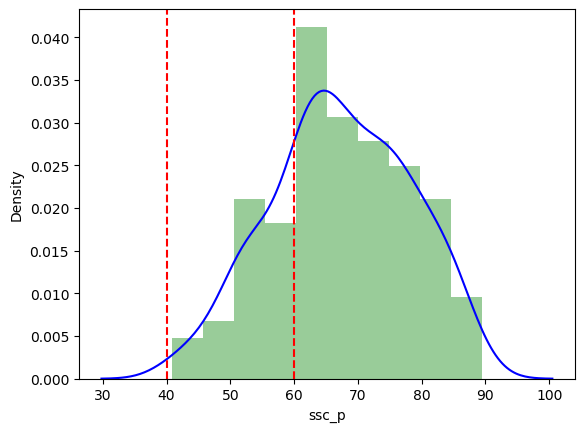

In [193]:
get_pdf_probability(data['ssc_p'],40,60)

## Zscore

In [194]:
#Z score

import pandas as pd
import seaborn as sns

def std_graph(data):
    mean=data.mean()
    std=data.std()
    value=list(data)
    z_score=[(X-mean/std) for X in value]
    sns.distplot(z_score,kde=True)

C:\Users\Arun\anaconda3\envs\aiml\lib\site-packages\ipykernel_launcher.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  # This is added back by InteractiveShellApp.init_path()


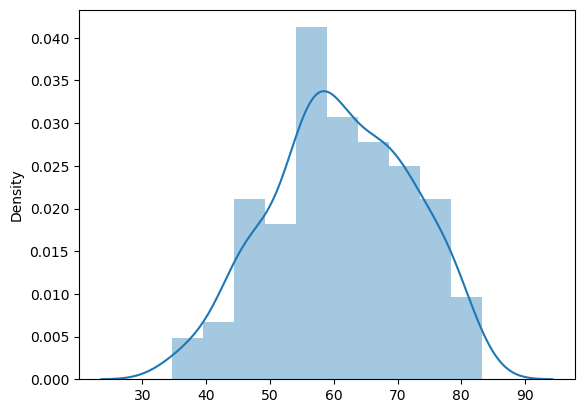

In [197]:
std_graph(data['ssc_p'])